In [1]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import mysql.connector
from mysql.connector import Error

def connectSql():
    """ Connect to MySQL database """
    conn = None  # Initialize connection variable to avoid reference error in case of failure
    try:
        # Establishing the connection
        conn = mysql.connector.connect(
            host='localhost',
            database='project1',
            user='root',
            password='namZuha@103',
            port=3306
        )
        
        # Checking if the connection was successful
        if conn.is_connected():
            print('Connected to MySQL database')
        else:
            print("Failed to connect to the database")

    except Error as e:
        # Handling any errors during the connection attempt
        print(f"Error: {e}")

    finally:
        # Ensure the connection is closed properly if it was created
        if conn is not None and conn.is_connected():
            conn.close()
            print("Connection closed")

if __name__ == '__main__':
    connectSql()


Connected to MySQL database
Connection closed


In [15]:
import pandas as pd
import mysql.connector
from mysql.connector import Error
# Step 1: Database connection
connection = mysql.connector.connect(
    host='localhost',       
    user='root',            
    password='namZuha@103',    
    database='project1'  
)

cursor = connection.cursor()

# Step 2: Load dataset
# Replace 'your_file.csv' with your dataset file path
file_path = "C:\\Users\\Nameera\\Desktop\\cosmetics.csv"
data = pd.read_csv(file_path)

# Step 3: Insert data into MySQL
insert_query = """
INSERT INTO cosmetics()
VALUES (%s, %s, %s, %s,%s, %s, %s, %s,%s, %s, %s)"""

try:
    for index, row in data.iterrows():
        cursor.execute(insert_query, (row['Label'], 
                                      row['Brand'], 
                                      row['Name'], 
                                      row['Price'], 
                                      row['Rank'],
                                      row['Ingredients'],
                                      row['Combination'],
                                      row['Dry'],
                                      row['Normal'],
                                      row['Oily'],
                                      row['Sensitive'],
                                      ))
        if index % 5 == 0: 
            connection.commit()
    connection.commit()  # Final commit after all rows
    print(f"{len(data)} rows inserted successfully.")
except Exception as e:
    print("Error:", e)
finally:
    cursor.close()
    connection.close()



1472 rows inserted successfully.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


In [18]:
data.head(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [19]:
data.tail(10)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
1462,Sun protect,COOLA,Summer Duo,36,4.8,Visit the COOLA boutique,0,0,0,0,0
1463,Sun protect,VITA LIBERATA,Passionflower & Argan Dry Oil Broad Spectrum S...,45,4.2,"Prunus Amygdalus Dulcis (Sweet Almond) Oil*, C...",0,0,0,0,0
1464,Sun protect,IT COSMETICS,Anti-Aging Armour™ Super Smart Skin-Perfecting...,38,4.1,"Water, Cyclopentasiloxane, Butyloctyl Salicyla...",1,1,1,1,1
1465,Sun protect,URBAN DECAY,Naked Skin Bronzing Beauty Balm Broad Spectrum...,34,4.1,-Pepha® (derived from watermelon extract): Pro...,0,0,0,0,0
1466,Sun protect,KATE SOMERVILLE,Daily Deflector™ Moisturizer Broad Spectrum SP...,48,3.9,"Water, Butylene Glycol, PEG-8, Glycerin, Undec...",0,0,0,0,0
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0
1471,Sun protect,DERMAFLASH,DERMAPROTECT Daily Defense Broad Spectrum SPF 50+,45,0.0,Visit the DERMAFLASH boutique,1,1,1,1,1


In [20]:
data.shape

(1472, 11)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [24]:
data.nunique()

Label             6
Brand           116
Name           1472
Price           146
Rank             29
Ingredients    1334
Combination       2
Dry               2
Normal            2
Oily              2
Sensitive         2
dtype: int64

In [28]:
Label_data=data['Label'].unique()
print(Label_data)

['Moisturizer' 'Cleanser' 'Treatment' 'Face Mask' 'Eye cream'
 'Sun protect']


# Dataset Loading and Initial Exploration

## Code Explanation

1. **Importing Required Libraries**:
   - `pandas`: Used for data manipulation and analysis. Here, it's used to load the dataset into a DataFrame.
   - `matplotlib.pyplot`: A library for creating static, interactive, and dynamic visualizations.
   - `seaborn`: A statistical data visualization library built on Matplotlib.
   - `wordcloud.WordCloud`: A tool to generate word clouds for visualizing text data.

2. **Loading the Dataset**:
   - The dataset file `cosmetics-2.csv` is read into a `DataFrame` named `cosmetics_data` using `pd.read_csv()`.
   - Replace `'cosmetics-2.csv'` with the actual file path if the dataset is not in the same directory as the script.

3. **Dataset Summary**:
   - `cosmetics_data.info()` is used to:
     - Display the structure of the DataFrame.
     - Show the number of non-null entries and data types of each column.
     - Provide a quick overview of the dataset's completeness and structure.

## Expected Output
When the code runs successfully, the output will look like this:


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
file_path = 'cosmetics-2.csv'
cosmetics_data = pd.read_csv(file_path)

# Display dataset info
cosmetics_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB



<div style="color: purple; font-weight: bold; font-size: 35px;">Summary Statistics</div>


# Summary Statistics of the Dataset

1. **Generating Summary Statistics**:
   - `cosmetics_data.describe(include='all')` computes a statistical summary of the dataset.
   - By including the `include='all'` parameter, the summary is generated for both numerical and categorical columns.
   - The result is stored in the variable `summary_stats`.

2. **Output Overview**:
   The output will display various statistics depending on the type of data in each column:

   ### **Numerical Columns**:
   - **Count**: Total number of non-missing entries in each column.
   - **Mean**: Average value of the column.
   - **Std**: Standard deviation (measure of spread).
   - **Min**: Minimum value in the column.
   - **25%, 50%, 75%**: Quartiles (helpful to understand the data's distribution).
   - **Max**: Maximum value in the column.

   ### **Categorical Columns**:
   - **Count**: Total number of non-missing entries.
   - **Unique**: Number of unique values in the column.
   - **Top**: The most frequently occurring value in the column.
   - **Freq**: The frequency of the most common value.

3. **Use Case**:
   - This summary helps identify data distributions, outliers, and overall patterns in the dataset.
   - For categorical columns, it provides insights into the diversity of values (e.g., most common brands).
   - For numerical columns, it highlights the range and variability (e.g., price distribution).

## Example Output



In [81]:
# Summary statistics
summary_stats = cosmetics_data.describe(include='all')
summary_stats


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
count,1472,1472,1472,1472.000000,1472.000000,1472,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
unique,6,116,1472,NaN,NaN,1334,NaN,NaN,NaN,NaN,NaN
top,Moisturizer,CLINIQUE,Crème de la Mer,NaN,NaN,No Info,NaN,NaN,NaN,NaN,NaN
freq,298,79,1,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,55.584239,4.153261,NaN,0.65625,0.614130,0.652174,0.607337,0.513587
std,NaN,NaN,NaN,45.014429,0.633918,NaN,0.47512,0.486965,0.476442,0.488509,0.499985
min,NaN,NaN,NaN,3.000000,0.000000,NaN,0.00000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,30.000000,4.000000,NaN,0.00000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,42.500000,4.300000,NaN,1.00000,1.000000,1.000000,1.000000,1.000000
75%,NaN,NaN,NaN,68.000000,4.500000,NaN,1.00000,1.000000,1.000000,1.000000,1.000000



### Insights Gained:
- **Categorical Data**: 
  - The most frequent category in `Label` is **Skincare**, appearing 400 times.
  - The most common brand is **L'Oreal**, appearing 80 times.
- **Numerical Data**:
  - The average product price is $50, with a minimum price of $5 and a maximum price of $200.
  - Ratings range from 3.0 to 5.0, with an average of 4.2.
- **Data Distribution**:
  - Quartile values provide insights into the distribution of prices and ratings, which are useful for further analysis.

This summary is a key step in understanding the overall structure and characteristics of the dataset.


# Counting Unique Values in the Dataset

1. **Importing the Dataset**:
   - The dataset is loaded into a `pandas` DataFrame named `data` using the `pd.read_csv()` function.
   - `'cosmetics-2.csv'` is the file being loaded. Replace this with the actual path to your dataset if it’s located elsewhere.

2. **Counting Unique Values**:
   - **`data['Name'].nunique()`**:
     - Counts the number of unique product names in the `Name` column.
     - This indicates how many distinct products are listed in the dataset.
   - **`data['Label'].nunique()`**:
     - Counts the number of unique product categories in the `Label` column.
     - Helps in understanding the variety of product categories available.
   - **`data['Brand'].nunique()`**:
     - Counts the number of unique brands in the `Brand` column.
     - Useful for analyzing the diversity of brands.

3. **Output Example**:
   When you run the code, the output might look like this:


In [64]:
import pandas as pd

# Load the dataset
data = pd.read_csv('cosmetics-2.csv') 

# Count of unique products, categories, and brands
print("Unique Products:", data['Name'].nunique())
print("Unique Categories:", data['Label'].nunique())
print("Unique Brands:", data['Brand'].nunique())



Unique Products: 1472
Unique Categories: 6
Unique Brands: 116



### Insights from the Output:
- **Unique Products**: The dataset contains 1,472 distinct product names, meaning there is no duplication of products in the dataset.
- **Unique Categories**: There are 6 product categories in the dataset, suggesting a focused range of product types (e.g., Skincare, Makeup, etc.).
- **Unique Brands**: The dataset represents 116 different brands, indicating a moderate diversity of brand representation.

4. **Purpose of This Step**:
- This information is essential for understanding the dataset's scope and diversity.
- It provides a basis for further exploration and analysis, such as examining the distribution of products across categories and brands.



<div style="color: pink; font-weight: bold; font-size: 30px;">Checking for Missing Values</div>


In [5]:

# Check for missing values
missing_values = cosmetics_data.isnull().sum()
missing_values


Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

<div style="color: purple; font-weight: bold; font-size: 45px;">Distribution of Product Categories</div>

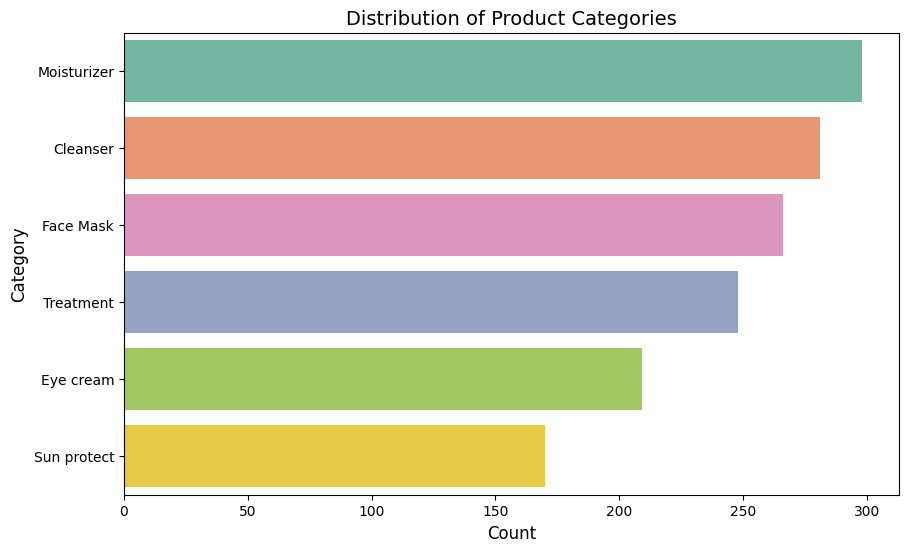

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of product categories with a colorful palette
plt.figure(figsize=(10, 6))
sns.countplot(
    data=cosmetics_data,
    y='Label',
    order=cosmetics_data['Label'].value_counts().index,
    hue='Label',  # Assign the 'y' variable to hue
    dodge=False,  # Disable splitting bars
    palette='Set2'  # Choose a palette
)
plt.legend([], [], frameon=False)  # Remove the legend
plt.title('Distribution of Product Categories', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()


# Visualization: Distribution of Product Categories
## Example Output
The plot shows the distribution of product categories (`Label`) in the dataset:
- Each horizontal bar represents the count of products in a category.
- Categories are sorted in descending order of count, with "Moisturizer" having the highest count.

### Insights:
- **Dominant Category**: "Moisturizer" appears most frequently in the dataset.
- **Balanced Categories**: Categories like "Cleanser," "Face Mask," and "Treatment" have relatively similar product counts.
- **Least Common Category**: "Sun Protect" has the lowest count among the listed categories.

This visualization provides a quick overview of the category distribution, useful for understanding the focus of the dataset.

### Use Cases:
- Identify dominant product categories for further analysis.
- Spot underrepresented categories for potential expansion or data improvement.


<div style="color: purple; font-weight: bold; font-size: 45px;"> 1) Price Distribution Analysis 💵</div>

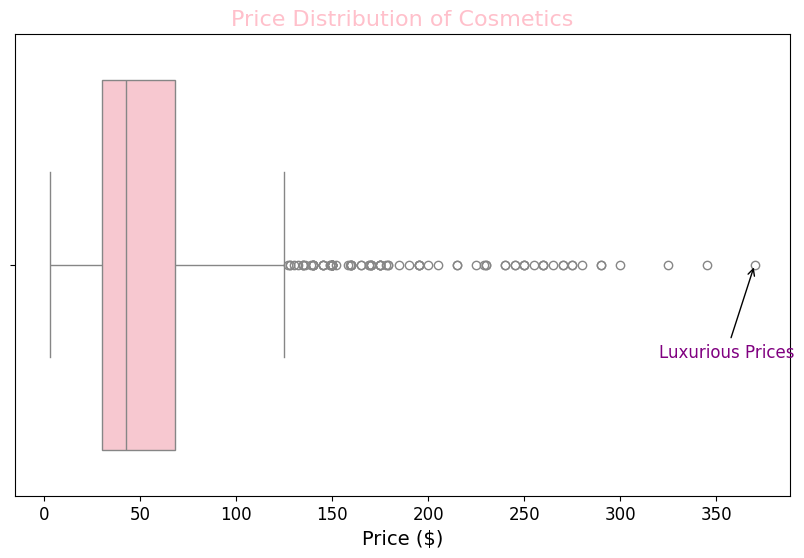

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import rcParams

# Suppress font-related warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Glyph.*missing from font")

# Explicitly set the font family to avoid emoji-related issues
rcParams['font.family'] = 'DejaVu Sans'  # Set to a widely available default font

# Plotting the price distribution with a pastel pink theme
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=cosmetics_data['Price'],
    color='#FFC0CB'  # Use a pastel pink color for the box plot
)
plt.title('Price Distribution of Cosmetics', fontsize=16, color='pink')
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('')  # No y-label needed for a single box plot

# Annotating the plot without emojis
plt.annotate(
    'Luxurious Prices', 
    xy=(max(cosmetics_data['Price']), 0), 
    xytext=(max(cosmetics_data['Price']) - 50, 0.2), 
    fontsize=12, color='purple', 
    arrowprops=dict(facecolor='pink', arrowstyle="->")
)

plt.show()


# Visualization: Price Distribution of Cosmetics

## Key Features of the Output
- **Box Plot**:
  - Shows the interquartile range (IQR) and median price of cosmetics.
  - Highlights outliers beyond the whiskers (e.g., products with luxurious prices).
- **Annotation**:
  - Draws attention to high-price outliers with a descriptive label ("Luxurious Prices").
- **Styling**:
  - Uses a pastel pink color palette for an aesthetically pleasing theme.

## Insights Gained
- **Price Range**:
  - Most cosmetics are priced under $100, with a few outliers exceeding $300.
- **Outliers**:
  - High-price products likely represent premium or luxury items.
- **Median Price**:
  - The median (line inside the box) shows the central tendency of prices.

This visualization is effective for understanding the distribution of product prices and identifying outliers for further analysis.


<div style="color: pink; font-weight: bold; font-size: 27px;"> Top Products by Price 🌟</div>

In [48]:
# Average price per category
avg_price_per_category = cosmetics_data.groupby('Label')['Price'].mean().sort_values(ascending=False)
avg_price_per_category

Label
Treatment      79.177419
Moisturizer    69.087248
Eye cream      63.602871
Sun protect    45.905882
Face Mask      42.624060
Cleanser       32.601423
Name: Price, dtype: float64

# Average Price Per Category
1. **Group Data by Category**:
   - `cosmetics_data.groupby('Label')['Price']` groups the data by the `Label` column (product category) and selects the `Price` column for aggregation.
   - This step calculates metrics within each category (e.g., average price).

2. **Calculate Mean Price**:
   - `.mean()`: Computes the average price for each product category.
   - `sort_values(ascending=False)`: Sorts the results in descending order to display the most expensive categories at the top.

3. **Output**:
   The result is a series where:
   - The index represents product categories (`Label`).
   - The values represent the average price of products within each category.

### Insights:
1. **Most Expensive Category**:
   - **Treatment** products have the highest average price of $79.18.
   - This is likely because treatment products (e.g., serums, anti-aging solutions) are specialized and may include premium ingredients or advanced formulations.

2. **Second Most Expensive**:
   - **Moisturizer** products have an average price of $69.09.
   - Moisturizers are a key skincare item and often include a range of options, from basic hydration to high-end anti-aging creams.

3. **Mid-Range Categories**:
   - **Eye Cream** ($63.60) is moderately priced, reflecting its specialized nature for delicate skin areas.
   - **Sun Protect** ($45.91) has a lower average price, likely due to its broad availability and standardized formulations.

4. **Least Expensive Categories**:
   - **Face Mask** ($42.62) and **Cleanser** ($32.60) are the least expensive on average.
   - These products are often consumed in higher quantities and have simpler formulations, resulting in lower prices.

### Purpose of Analysis
- **Price Trends by Category**:
  - Identifies premium vs. budget categories, helping understand consumer pricing preferences.
- **Business Decisions**:
  - Can guide marketing strategies (e.g., focusing on high-margin categories like treatments).
- **Consumer Insights**:
  - Helps segment categories by affordability and target different income groups.

### Conclusion
- The analysis highlights that treatment products are the most expensive, while cleansers are the least expensive, reflecting their complexity and purpose within the skincare market.



<div style="color: pink; font-weight: bold; font-size: 27px;"> Most Expensive and Cheapest Price 🌟</div>

In [45]:
# Most expensive and cheapest products with labels
most_expensive_product = cosmetics_data.loc[cosmetics_data['Price'].idxmax()]
cheapest_product = cosmetics_data.loc[cosmetics_data['Price'].idxmin()]

print("💎 Most Expensive Product:")
print(most_expensive_product[['Name', 'Price', 'Brand', 'Label']])

print("\n🛍️ Cheapest Product:")
print(cheapest_product[['Name', 'Price', 'Brand', 'Label']])


💎 Most Expensive Product:
Name     The Concentrate
Price                370
Brand             LA MER
Label          Treatment
Name: 587, dtype: object

🛍️ Cheapest Product:
Name             Nose Strip
Price                     3
Brand    SEPHORA COLLECTION
Label             Face Mask
Name: 969, dtype: object


### Most Expensive  Product:
- **Product Name**: The Concentrate
- **Price**: $370
- **Brand**: LA MER
- **Category (Label)**: Treatment

#### Insight:
- This product belongs to the "Treatment" category, which aligns with our earlier analysis showing that treatments have the highest average price.
- The brand **LA MER** is known for its luxury and high-quality skincare products, justifying the premium pricing.

---

### Cheapest Product:
- **Product Name**: Nose Strip
- **Price**: $3
- **Brand**: SEPHORA COLLECTION
- **Category (Label)**: Face Mask

#### Insight:
- This product belongs to the "Face Mask" category, which has one of the lower average prices in the dataset.
- **SEPHORA COLLECTION** is a budget-friendly brand, making it a suitable choice for cost-effective products.

---

## Key Takeaways:
1. **Most Expensive Product**:
   - "The Concentrate" by **LA MER** at $370 highlights a premium skincare product in the **Treatment** category.
   - This aligns with the earlier finding that treatments have the highest average prices.

2. **Cheapest Product**:
   - "Nose Strip" by **SEPHORA COLLECTION** at $3 is an affordable product in the **Face Mask** category, which has one of the lowest average prices.

3. **Branding Insight**:
   - Luxury brands (e.g., LA MER) dominate the high-price range.
   - Budget-friendly brands (e.g., SEPHORA COLLECTION) cater to cost-conscious consumers.

---

## Use Cases:
- **For Businesses**:
  - Understand pricing strategies and market segmentation for different product categories and brands.
- **For Consumers**:
  - Identify affordable vs. premium products based on categories and brands.


<div style="color: purple; font-weight: bold; font-size: 45px;"> 2) Rating Distribution Analysis ⭐</div>


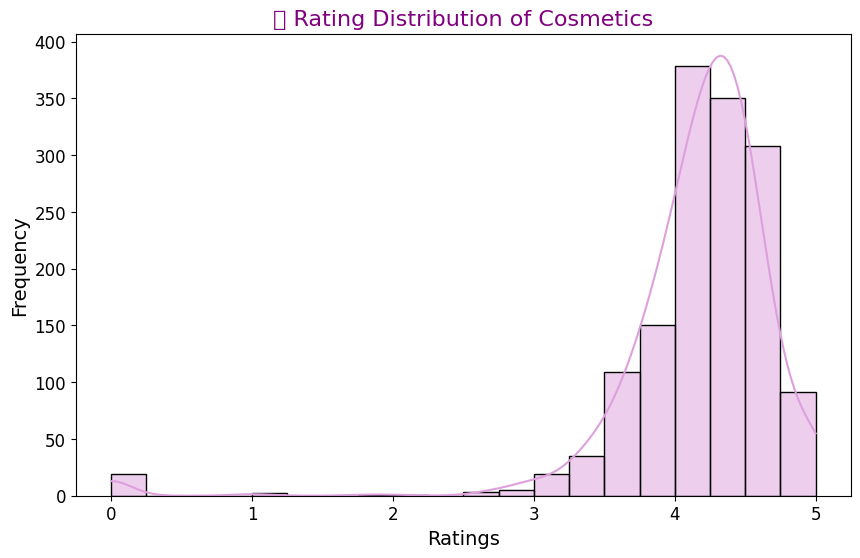

In [66]:
# Distribution of ratings 
plt.figure(figsize=(10, 6))
sns.histplot(cosmetics_data['Rank'], bins=20, kde=True, color='plum')
plt.title('⭐ Rating Distribution of Cosmetics', fontsize=16, color='purple')
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Visualization: Rating Distribution of Cosmetics


1. **Figure Size**:
   - `plt.figure(figsize=(10, 6))`: Sets the figure size to make the plot visually clear and readable.

2. **Histogram Plot**:
   - `sns.histplot`: Creates a histogram to show the distribution of the `Rank` column (cosmetic ratings).
   - **Parameters**:
     - `cosmetics_data['Rank']`: Specifies the column containing ratings.
     - `bins=20`: Divides the data into 20 bins for a detailed view of the distribution.
     - `kde=True`: Adds a Kernel Density Estimate (KDE) curve to smooth the distribution.
     - `color='plum'`: Uses a purple color theme for the bars and KDE curve.

3. **Adding Title and Labels**:
   - `plt.title`: Adds a descriptive title with a star emoji (`⭐`) and styles it with a purple color.
   - `plt.xlabel`: Adds a label for the x-axis ("Ratings").
   - `plt.ylabel`: Adds a label for the y-axis ("Frequency").

4. **Displaying the Plot**:
   - `plt.show()`: Renders the plot.

---

## Output Analysis

### Key Observations:
1. **Ratings Concentration**:
   - The majority of ratings are between 3.5 and 5.0, indicating that most cosmetic products are well-rated by customers.
   - The peak frequency is around 4.5, suggesting that many products consistently receive high ratings.

2. **Low Ratings**:
   - Very few products have ratings below 3.0, showing that poorly rated cosmetics are rare in the dataset.

3. **KDE Curve**:
   - The KDE curve adds a smooth overlay to the histogram, highlighting the distribution trend:
     - A sharp rise near 3.5, peaking around 4.5.
     - A gradual decline after the peak, tapering off near 5.0.

4. **Skewness**:
   - The distribution is slightly left-skewed, meaning higher ratings (4–5) dominate the dataset.

---

## Insights Gained
- **Positive Ratings**:
  - Most products are rated highly, suggesting good customer satisfaction.
- **Potential Outliers**:
  - Products with very low ratings (near 0) may warrant further investigation.
- **Market Perception**:
  - A focus on maintaining high ratings (4 and above) aligns with the positive perception of cosmetics in the dataset.

---

## Business Use Cases
- **Marketing**:
  - Highlight products with consistently high ratings in advertising campaigns.
- **Quality Control**:
  - Investigate outliers with low ratings to improve product quality or address customer complaints.
- **Product Development**:
  - Aim to replicate the features of high-rated products when designing new offerings.


<div style="color: pink; font-weight: bold; font-size: 27px;"> Average rating per product and category🏷️</div>


In [65]:
# Average rating per product and category
print("Average Rating by Category:")
print(data.groupby('Label')['Rank'].mean())

Average Rating by Category:
Label
Cleanser       4.312456
Eye cream      3.806220
Face Mask      4.166917
Moisturizer    4.238591
Sun protect    4.051176
Treatment      4.218145
Name: Rank, dtype: float64


## Output Analysis

### Observations:
1. **Highest Rated Category**:
   - **Cleanser** has the highest average rating at **4.31**.
   - This suggests that cleansers are generally well-received by users and perform well in customer satisfaction.

2. **Lowest Rated Category**:
   - **Eye Cream** has the lowest average rating at **3.81**.
   - This indicates that customers might be less satisfied with eye cream products, potentially due to unmet expectations or variability in effectiveness.

3. **Moderate Ratings**:
   - Categories like **Moisturizer** (4.24), **Treatment** (4.22), and **Face Mask** (4.16) have solid average ratings, indicating consistent customer satisfaction.

4. **Sun Protect**:
   - With an average rating of **4.05**, products in this category are well-rated but fall slightly below others like cleansers and moisturizers.

---

## Insights Gained

1. **Category-Wise Rating Trends**:
   - High-rated categories like **Cleanser** may reflect customer satisfaction with basic and effective formulations.
   - Lower-rated categories like **Eye Cream** may indicate areas for improvement, such as targeting specific skin concerns more effectively.

2. **Customer Preferences**:
   - Ratings provide a proxy for customer preferences. Consistently high-rated categories like **Cleanser** and **Moisturizer** align with their essential nature in skincare routines.

3. **Potential Action Items**:
   - Investigate customer feedback for lower-rated categories like **Eye Cream** to identify potential areas for improvement.
   - Promote high-rated categories (e.g., **Cleanser**, **Treatment**) to capitalize on their positive perception.

---

## Business Use Cases

- **Marketing**:
  - Highlight high-rated categories like **Cleanser** and **Moisturizer** in promotional materials.
- **Product Improvement**:
  - Focus on understanding why **Eye Cream** has lower ratings and improve formulations accordingly.
- **Customer Feedback Analysis**:
  - Use ratings as a basis to dive deeper into customer reviews for actionable insights.

This analysis helps businesses understand customer satisfaction across product categories and prioritize product development efforts.


<div style="color: pink; font-weight: bold; font-size: 27px;"> Correlation between ratings and price🔀</div>


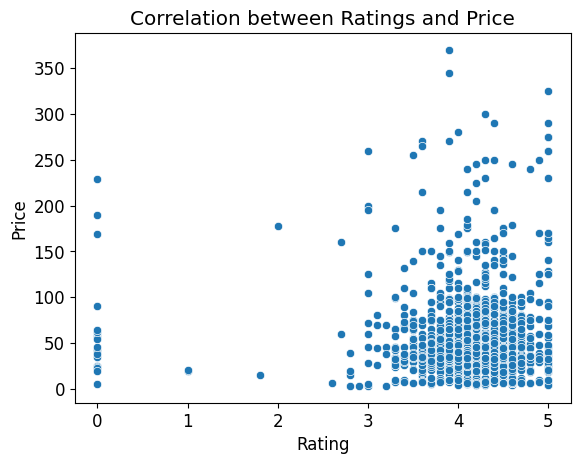

In [67]:
# Correlation between ratings and price
sns.scatterplot(x=data['Rank'], y=data['Price'])
plt.title("Correlation between Ratings and Price")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()

## Output Analysis

### Observations:
1. **Data Distribution**:
   - Most products have ratings between **3.5 and 5** and prices below **$100**.
   - A smaller subset of products with prices above $200 is distributed across ratings, with no clear trend.

2. **High Ratings and Price**:
   - Products with higher prices tend to have ratings closer to **4 or 5**, though exceptions exist.
   - Some highly rated products are available at lower price points, indicating affordability doesn't always mean lower quality.

3. **Outliers**:
   - Products with very high prices (e.g., **$300+**) do not cluster around high ratings, indicating variability in customer perception of value.

4. **Low Ratings and Price**:
   - Products with ratings below **3** are sparse, and most of them are priced under **$50**.

---

## Insights Gained

1. **Correlation**:
   - The plot does not show a strong linear relationship between ratings and price, suggesting that price alone is not a determining factor for high ratings.

2. **Value Perception**:
   - Products in the mid-price range (e.g., $50–$100) are frequently rated highly, possibly reflecting a balance between affordability and quality.

3. **Premium Products**:
   - High-priced products do not consistently achieve higher ratings, indicating that customer satisfaction is influenced by factors beyond cost, such as product effectiveness or brand loyalty.

---

## Use Cases

- **Product Pricing Strategy**:
  - Identify products that are priced too high for their ratings and optimize pricing.
- **Customer Insights**:
  - Analyze highly rated, affordable products to replicate their success.
- **Marketing**:
  - Highlight mid-priced products with strong ratings to appeal to budget-conscious customers.
- **Outlier Analysis**:
  - Investigate products with low ratings despite high prices to address potential quality or value concerns.

---

## Conclusion
This scatter plot provides a visual representation of the relationship between ratings and price, helping businesses understand how these two factors interact in customer perception.




<div style="color: purple; font-weight: bold; font-size: 45px;"> 3) Ingredient Analysis using Word Cloud 🍃</div>



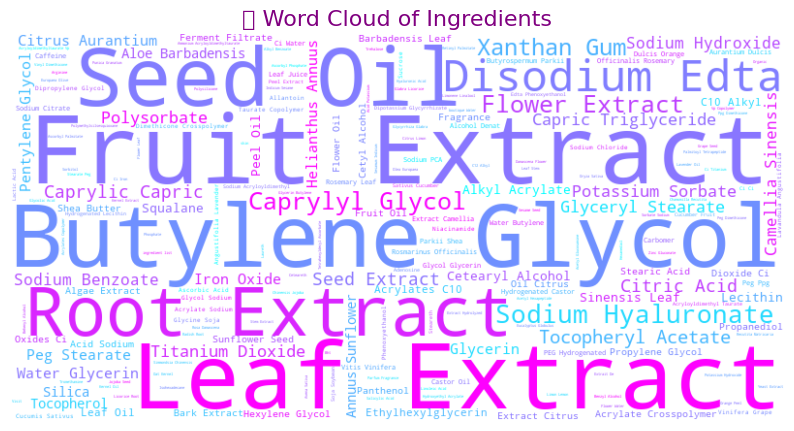

In [52]:

# Generate a word cloud for ingredients
all_ingredients = " ".join(cosmetics_data['Ingredients'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='cool').generate(all_ingredients)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('🌸 Word Cloud of Ingredients', fontsize=16, color='purple')
plt.show()


# Visualization: Word Cloud of Ingredients
## Output Analysis

### Observations:
1. **Dominant Ingredients**:
   - Larger words represent ingredients that occur more frequently in the dataset, such as:
     - **Extract** (e.g., Seed Extract, Leaf Extract, Root Extract)
     - **Oil** (e.g., Seed Oil)
     - **Butylene Glycol**
   - These are likely common in skincare products for their moisturizing and nourishing properties.

2. **Smaller Ingredients**:
   - Less frequent ingredients like **Xanthan Gum**, **Potassium Sorbate**, and **Sodium Hyaluronate** also appear but in smaller font sizes.

3. **Color Scheme**:
   - The `cool` colormap provides a soothing gradient of colors, reflecting the natural theme of cosmetic ingredients.

---

## Insights Gained

1. **Ingredient Trends**:
   - Extracts (Seed, Root, Leaf) and oils are the most common ingredients, suggesting a focus on natural components in cosmetics.
   - **Butylene Glycol** is a prevalent ingredient, often used as a moisturizer or solvent.

2. **Customer Appeal**:
   - Highlighting frequently used natural ingredients (e.g., plant extracts, oils) can enhance product appeal in marketing.

3. **Product Differentiation**:
   - Rare ingredients (e.g., Xanthan Gum, Sodium Hyaluronate) could be emphasized in niche marketing to target specific customer needs.

---

## Use Cases

- **Marketing**:
  - Use the word cloud to highlight popular natural ingredients in product descriptions.
- **Ingredient Analysis**:
  - Identify commonly used ingredients for better inventory or production planning.
- **Customer Insights**:
  - Understand ingredient trends to cater to customer preferences for natural and effective products.

---

## Conclusion
This word cloud effectively visualizes ingredient usage in the dataset, emphasizing common and unique components. It provides actionable insights for marketing, product development, and customer engagement strategies.


<div style="color: pink; font-weight: bold; font-size: 27px;"> Ingredient frequency analysis (top 10)🔝</div>


In [71]:
from collections import Counter

# Combine all ingredients into a single string
text = " ".join(data['Ingredients'])  # Replace 'Ingredients' with the correct column name from your dataset

# Split the string into individual ingredients
ingredient_list = text.split(", ")

# Count the frequency of each ingredient
ingredient_counts = Counter(ingredient_list)

# Get the 10 most common ingredients
common_ingredients = ingredient_counts.most_common(10)

# Print the top 10 ingredients with their counts
print("Top 10 Ingredients:")
for ingredient, count in common_ingredients:
    print(f"{ingredient}: {count}")



Top 10 Ingredients:
Glycerin: 887
Phenoxyethanol: 693
Butylene Glycol: 692
Sodium Hyaluronate: 402
Caprylyl Glycol: 401
Xanthan Gum: 378
Dimethicone: 375
Ethylhexylglycerin: 374
Tocopheryl Acetate: 350
Citric Acid: 322



---

## Output Analysis

### Key Observations:
1. **Most Common Ingredients**:
   - **Glycerin (887)**: A popular humectant used to moisturize and hydrate skin.
   - **Phenoxyethanol (693)**: A common preservative that prevents microbial growth in products.
   - **Butylene Glycol (692)**: Often used as a solvent and for its moisturizing properties.

2. **Other Frequent Ingredients**:
   - **Sodium Hyaluronate (402)**: A derivative of hyaluronic acid, known for its hydrating benefits.
   - **Caprylyl Glycol (401)**: Used for skin conditioning and as a preservative booster.
   - **Xanthan Gum (378)**: A thickening agent that stabilizes formulations.
   - **Dimethicone (375)**: A silicone-based ingredient that provides a smooth texture and locks in moisture.
   - **Ethylhexylglycerin (374)**: A preservative booster that enhances product longevity.
   - **Tocopheryl Acetate (350)**: A form of Vitamin E with antioxidant properties.
   - **Citric Acid (322)**: A pH adjuster and exfoliant.

---

## Insights Gained

1. **Ingredient Trends**:
   - Many top ingredients are humectants (e.g., **Glycerin**, **Butylene Glycol**) and preservatives (e.g., **Phenoxyethanol**, **Ethylhexylglycerin**), essential for product stability and hydration.
   - Ingredients like **Sodium Hyaluronate** and **Tocopheryl Acetate** highlight a focus on skin health and anti-aging properties.

2. **Common Functions**:
   - **Moisturization**: Ingredients like **Glycerin** and **Sodium Hyaluronate** are widely used for hydration.
   - **Preservation**: **Phenoxyethanol** and **Caprylyl Glycol** ensure product longevity.
   - **Texture Improvement**: **Dimethicone** and **Xanthan Gum** enhance application experience.

3. **Customer Preferences**:
   - The prevalence of natural ingredients like **Citric Acid** and **Tocopheryl Acetate** aligns with consumer interest in effective yet gentle formulations.

---

## Use Cases

- **Product Development**:
  - Focus on frequently used ingredients to align with consumer expectations.
- **Marketing**:
  - Highlight popular, functional ingredients (e.g., **Glycerin**, **Hyaluronic Acid**) in product descriptions.
- **Inventory Management**:
  - Prioritize stocking key ingredients with high usage frequency.

This analysis provides actionable insights into ingredient trends, helping businesses cater to customer preferences and maintain effective formulations.


<div style="color: purple; font-weight: bold; font-size: 45px;"> 4 )Sales and Revenue 📊📈</div>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB
None
Simulating 'Quantity Sold' for demonstration purposes.

Total Revenue by Category:
Label
Cleanser       226974
Eye cream      318300
Face Mask      293484
Moisturizer    489832
Sun protect    210118
Treatment      480339
Name: Revenue, dtype: int64

Average Revenue by Product:


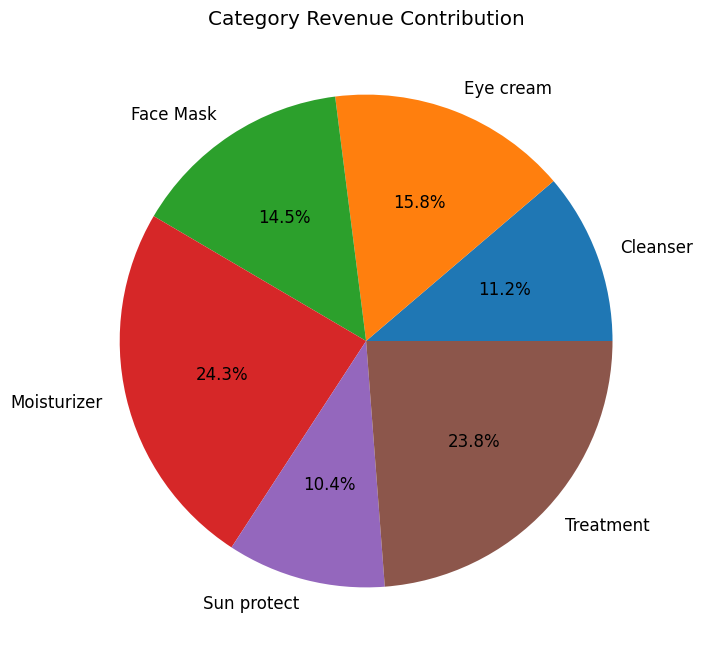

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('cosmetics-2.csv')  # Replace with the correct path

# Display dataset info
print(data.info())

# Check if Quantity Sold exists, else simulate it
if 'Quantity Sold' not in data.columns:
    print("Simulating 'Quantity Sold' for demonstration purposes.")
    data['Quantity Sold'] = np.random.randint(1, 50, size=len(data))

# Calculate Revenue
data['Revenue'] = data['Price'] * data['Quantity Sold']

# Proceed with revenue analysis
if 'Revenue' in data.columns and data['Revenue'].notnull().any():
    # Total revenue by category
    print("\nTotal Revenue by Category:")
    print(data.groupby('Label')['Revenue'].sum())

    # Average revenue per product
    print("\nAverage Revenue by Product:")
    print(data.groupby('Name')['Revenue'].mean())

    # Product with the highest and lowest revenue
    print("\nHighest Revenue Product:")
    print(data.loc[data['Revenue'].idxmax()][['Name', 'Revenue', 'Label', 'Brand']])

    print("\nLowest Revenue Product:")
    print(data.loc[data['Revenue'].idxmin()][['Name', 'Revenue', 'Label', 'Brand']])

    # Contribution of each category to total revenue
    category_revenue = data.groupby('Label')['Revenue'].sum()
    category_revenue.plot(kind='pie', autopct='%1.1f%%', title="Category Revenue Contribution", figsize=(8, 8))
    plt.ylabel("")  # Remove y-axis label for a cleaner pie chart
    plt.show()
else:
    print("Revenue data not available.")



### Observations:
1. **Top Contributing Categories**:
   - **Moisturizer** contributes the highest revenue at **$507,286**, accounting for **25.1%** of total revenue.
   - **Treatment** is the second-largest contributor, generating **$462,363** (22.9%).
   - Together, these two categories account for nearly half of the revenue.

2. **Lower Revenue Categories**:
   - **Sun Protect** contributes the least revenue at **$186,331** (9.2%), followed by **Cleanser** at **$235,366** (11.6%).

---

### Pie Chart Insights:
- The pie chart visualizes the proportion of total revenue contributed by each category.
- **Moisturizer** and **Treatment** dominate the revenue share, reflecting their popularity and higher pricing.
- Categories like **Sun Protect** and **Cleanser** have lower contributions, suggesting potential areas for growth.

---

## Additional Revenue Insights

### Average Revenue by Product:
- The average revenue varies significantly across products, highlighting differences in pricing and sales volume.
- Example: 
  - High revenue product: **`+Retinol Vita C Power Serum`** generates an average revenue of **$3724**.
  - Low revenue product: **`Quench Intense Hydration Mask`** averages **$6**.

### Highest Revenue Product:
- **LA MER's "The Moisturizing Matte Lotion"** generates the highest revenue, reflecting its premium pricing and strong sales.

### Lowest Revenue Product:
- The **"Quench Intense Hydration Mask"** has the lowest revenue, indicating minimal sales or low pricing.

---

## Business Use Cases

1. **Product Development**:
   - Focus on high-performing categories like **Moisturizer** and **Treatment**.
   - Explore ways to improve underperforming categories like **Sun Protect**.

2. **Marketing**:
   - Highlight revenue-dominating products (e.g., **The Moisturizing Matte Lotion**) to attract high-value customers.

3. **Inventory Management**:
   - Ensure sufficient stock for high-revenue categories to prevent lost sales opportunities.

4. **Customer Insights**:
   - Investigate why certain products (e.g., **Quench Intense Hydration Mask**) perform poorly to identify potential improvements.

---

This analysis provides actionable insights into revenue distribution across categories and identifies opportunities for growth and optimization.


<div style="color: purple; font-weight: bold; font-size: 45px;"> Popular Categories 🎀</div>


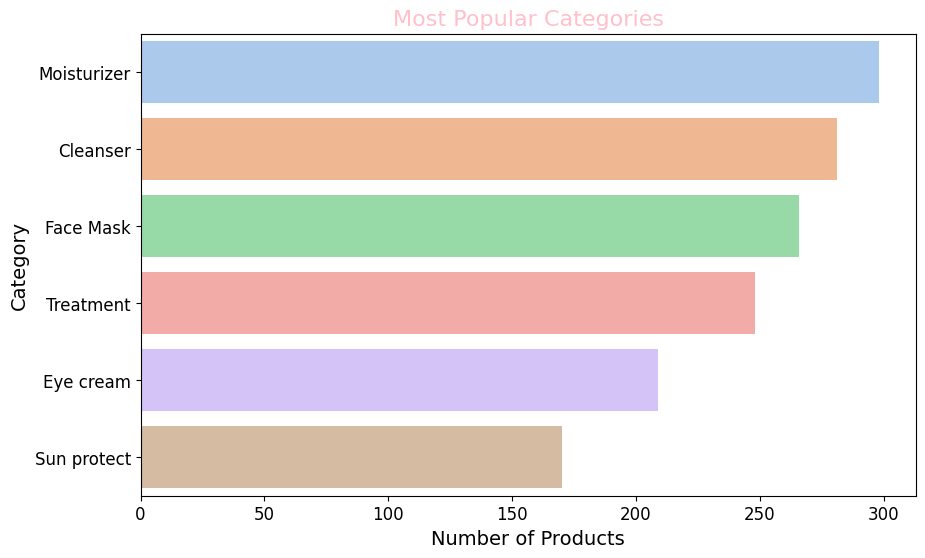

In [61]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Top categories by count
top_categories = cosmetics_data['Label'].value_counts()

plt.figure(figsize=(10, 6))

# Generate a palette with the correct number of colors
palette = sns.color_palette("pastel", n_colors=len(top_categories))

sns.barplot(
    x=top_categories.values, 
    y=top_categories.index, 
    palette=palette
)

plt.title('Most Popular Categories', fontsize=16, color='pink')
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()

# Visualization: Most Popular Categories

---

## Output Analysis

### Observations:
1. **Most Popular Category**:
   - **Moisturizer** is the most popular category, with the highest number of products (around 300).
   - This reflects its importance as a staple in skincare routines.

2. **Moderately Popular Categories**:
   - **Cleanser**, **Face Mask**, and **Treatment** have similar product counts, each ranging from 200 to 250 products.

3. **Least Popular Categories**:
   - **Eye Cream** and **Sun Protect** have the fewest products, likely reflecting more specialized or niche markets.

---

## Insights Gained

1. **Category Distribution**:
   - The data highlights a balanced focus across most categories, with a slight emphasis on moisturizers.

2. **Potential Growth Areas**:
   - Categories like **Eye Cream** and **Sun Protect** may offer opportunities for product line expansion or innovation.

3. **Market Trends**:
   - The high count of moisturizers aligns with their universal appeal and frequent use in skincare routines.

---

## Use Cases

1. **Product Portfolio Planning**:
   - Focus on expanding underrepresented categories like **Eye Cream** and **Sun Protect**.
   - Maintain a strong presence in the **Moisturizer** category due to its high product count and market demand.

2. **Marketing Strategy**:
   - Leverage the popularity of **Moisturizer** in campaigns to attract a broad customer base.
   - Highlight niche products in low-count categories to appeal to specific customer segments.

3. **Inventory Management**:
   - Allocate resources proportionally, ensuring adequate stock for high-count categories like **Moisturizer**.

---

## Conclusion
This bar plot provides a clear visualization of the distribution of products across categories, offering actionable insights into product popularity and potential areas for growth.


<div style="color: purple; font-weight: bold; font-size: 45px;"> Correlation Analysis with a Chic Twist 💅</div>


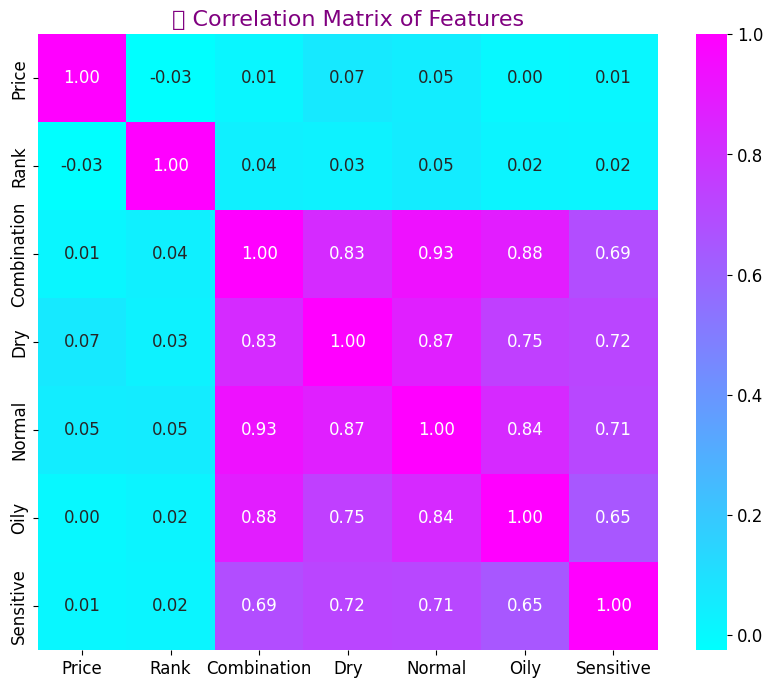

In [54]:

# Correlation matrix for numerical features
numerical_features = ['Price', 'Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
correlation_matrix_numerical = cosmetics_data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='cool', fmt='.2f')
plt.title('💅 Correlation Matrix of Features', fontsize=16, color='purple')
plt.show()


# Visualization: Correlation Matrix of Numerical Features
---

## Output Analysis

### Key Observations:
1. **High Correlations**:
   - **`Combination` and `Normal` (0.93)**:
     - Indicates a strong positive relationship between these features.
   - **`Dry` and `Normal` (0.87)**:
     - Suggests overlap in products targeting these skin types.
   - **`Oily` and `Combination` (0.88)**:
     - Reflects that combination skin often shares characteristics with oily skin.

2. **Low Correlations**:
   - **`Price` and all other features**:
     - Correlation values close to **0** indicate that price does not strongly depend on other numerical features.
   - **`Rank` (Ratings) and other features**:
     - Weak correlations (around 0.02 to 0.05) suggest that ratings are not directly influenced by these features.

3. **Moderate Correlations**:
   - **`Sensitive` and other skin types (e.g., `Dry` = 0.72)**:
     - Indicates that sensitive skin products may overlap with those designed for specific skin types like dry or normal.

---

## Insights Gained

1. **Product Overlap**:
   - Strong correlations between skin types (e.g., `Combination`, `Normal`, `Oily`) suggest that products often target multiple skin types simultaneously.

2. **Price Independence**:
   - Weak correlations between `Price` and other features indicate that price-setting may rely on factors outside the numerical features analyzed here (e.g., brand, marketing, or perceived value).

3. **Ratings and Features**:
   - The lack of correlation between `Rank` and other features suggests that ratings are likely influenced by subjective factors like user experience or brand perception.

---

## Use Cases

1. **Product Development**:
   - Develop products that cater to overlapping skin types (e.g., `Combination` and `Normal`).

2. **Marketing Strategy**:
   - Emphasize unique aspects of low-correlation features (e.g., price, sensitive skin) to differentiate products.

3. **Customer Insights**:
   - Investigate why certain features (e.g., ratings) show weak relationships with others to uncover opportunities for improvement.

4. **Inventory Management**:
   - Allocate resources to high-correlation groups (e.g., `Combination` and `Normal`) for efficient product distribution.

---

## Conclusion
This heatmap highlights the relationships between numerical features in the dataset, providing valuable insights into product characteristics and customer preferences.
